<a href="https://colab.research.google.com/github/Harlequelrah/Learning_data_science/blob/main/Learning_data_science/Construisez_des_data_visualisations_avec_Matplotlib_et_Seaborn/Tracez_des_graphiques_avec_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matplotlib permet de faire de la visualisation en particulier avec pyplot**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Chaque représentation graphique a une fonction correspondante avec Matplotlib :

- nuage de points (scatter plot) :scatter() ;

- diagrammes en ligne ou en courbes :plot() ;

- diagrammes en barres :bar() ;

- histogrammes :hist() ;

- diagrammes circulaires :pie() .

In [ ]:
prets = pd.read_csv('https://raw.githubusercontent.com/Harlequelrah/Learning_data_science/refs/heads/main/Learning_data_science/data/prets.csv')
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

**Tracez vos premiers graphiques**

1- *Le nuage de points*:    
On le représente grâce à la méthode scatter.Il a besoin de deux arguments x(variable en abscisse) et y (variable en ordonnée) . Représentons le taux d’endettement en fonction du revenu.



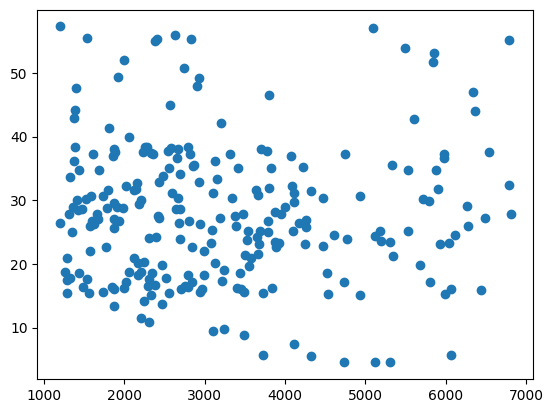

In [3]:
plt.scatter(prets['revenu'],prets['taux_endettement'])

On peut personnalisé un nuage de points

- la couleur avec l'argument color ou c

- la taille des points avec l'argument size ou s

- le marqueur avec l'argument marker

- la transparence des points avec l'argument alpha

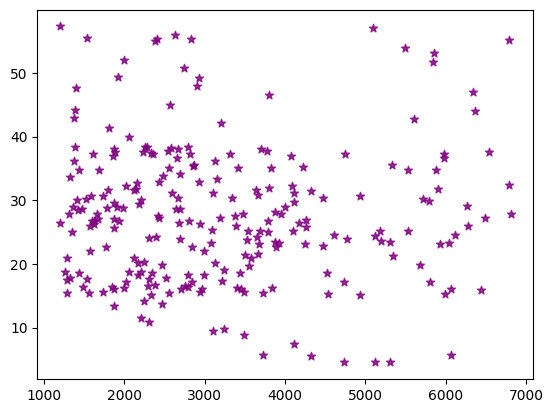

In [4]:
plt.scatter(prets['revenu'],prets['taux_endettement'],color='purple',marker='*',alpha=0.8)

2 - *Le diagramme circulaire*:

On le représente grâce à la méthode pie.Il a besoin de deux arguments labels(variable numérique sur laquel les données ont été agrégées) et x les variables correspondantes . Représentons le chiffre d'affaire total par agence.



([<matplotlib.patches.Wedge at 0x7d6830293e50>,
 [Text(1.0735482881610743, 0.23977921716951908, 'BORDEAUX'),
  Text(0.7559779757294925, 0.7990602606887286, 'LYON'),
  Text(-0.2207948127606491, 1.0776129410219561, 'MARSEILLE'),
  Text(-0.9928563382020422, 0.47353594551209344, 'NICE'),
  Text(-0.35667747630629365, -1.040567719034073, 'PARIS'),
  Text(1.058235353672122, -0.3002298057129555, 'TOULOUSE')],
 [Text(0.5855717935424041, 0.13078866391064675, '6.99%'),
  Text(0.41235162312517776, 0.435851051284761, '11.89%'),
  Text(-0.12043353423308131, 0.587788876921067, '18.66%'),
  Text(-0.5415580026556593, 0.2582923339156873, '10.74%'),
  Text(-0.19455135071252377, -0.5675823922004034, '42.91%'),
  Text(0.5772192838211574, -0.16376171220706662, '8.80%')])

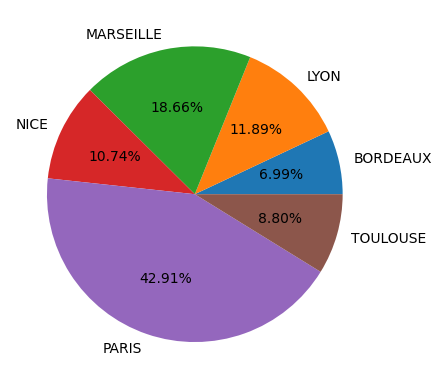

In [5]:
data = prets.groupby('ville')['remboursement'].sum()
data=data.reset_index()
plt.pie(labels=data['ville'],x=data['remboursement'],autopct="%.2f%%")

3- *Le diagramme à barre* :

On le représente grâce à la méthode bar.Il a besoin de deux arguments x(variable numérique sur laquel les données ont été agrégées) et height les variables correspondantes . Représentons le chiffre d'affaire total par agence.



<BarContainer object of 6 artists>

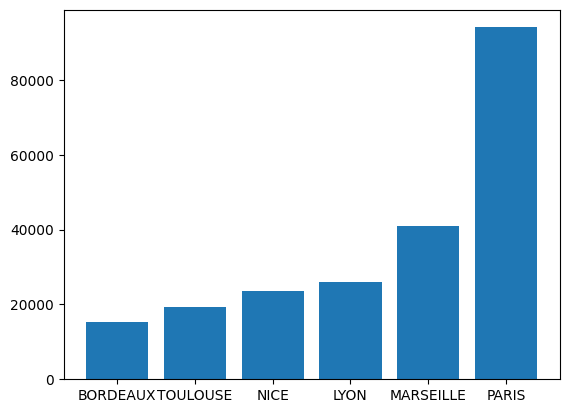

In [6]:
sorted_data= data.sort_values(by='remboursement')
plt.bar(x=sorted_data['ville'],height=sorted_data['remboursement'])

4- *L'histogramme* :

On le représente grâce à la méthode hist.Il a besoin de la variable numérique sur laquelle on souhaite connaître la distribution . Répondons à a question : Comment se répartissent nos clients en termes de revenus ?.



(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

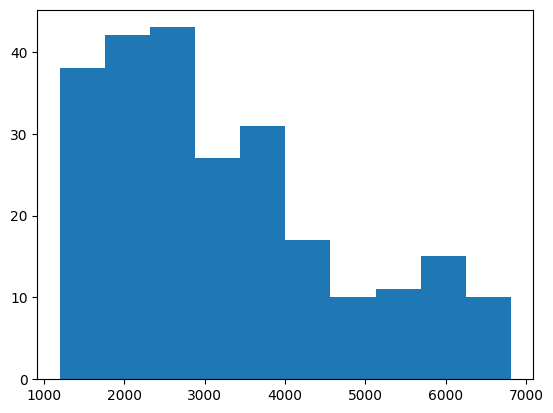

In [7]:
plt.hist(prets['revenu'])

5- *L'histogramme* :

On le représente grâce à la méthode plot.
On souhaite suivre l’évolution du chiffre d'affaires sur les 4 premiers mois.



In [8]:
evolution_ca= pd.DataFrame({
    'date':['2025-01-01','2025-02-01','2025-03-01','2025-04-01'],
    "chiffre d'affaire" : [183000,193020,179032,219174]
})
evolution_ca

,date,chiffre d'affaire
0,2025-01-01,183000
1,2025-02-01,193020
2,2025-03-01,179032
3,2025-04-01,219174


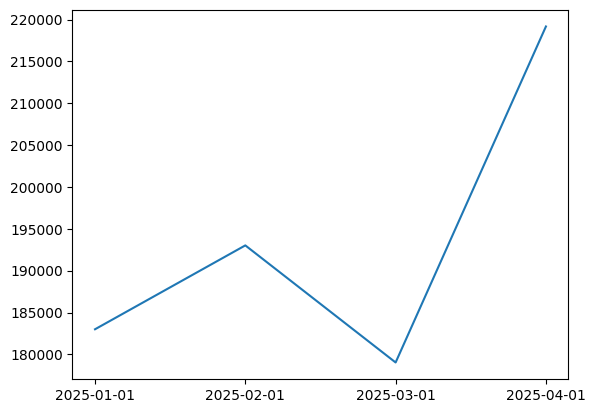

In [9]:
plt.plot(evolution_ca['date'],evolution_ca["chiffre d'affaire"])

on peut personnaliser avec la couleur color ou c  , son style linestyle ou ls , un marquer en plus de la ligne marker

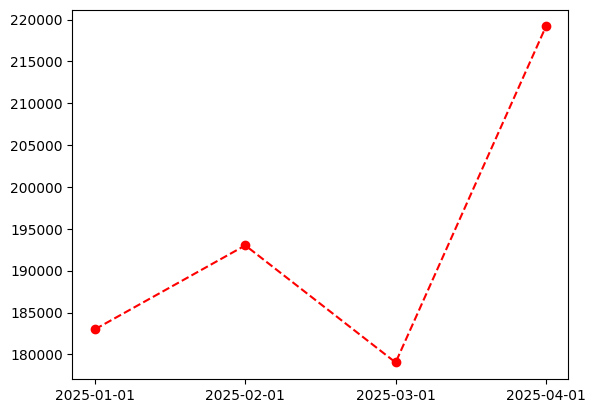

In [10]:
plt.plot(evolution_ca['date'],evolution_ca["chiffre d'affaire"],marker='o',color='red',ls='--')

**Créez plusieurs graphiques sur une même fenêtre**

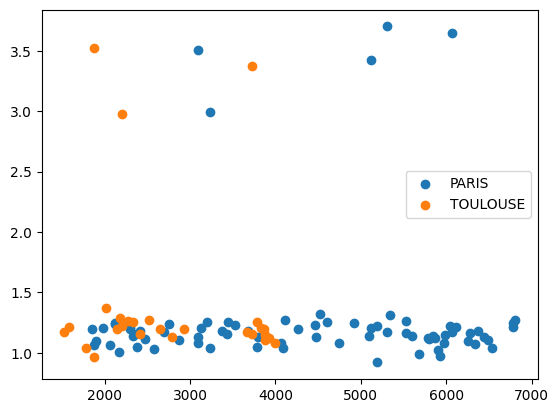

In [13]:
df1 = prets.loc[prets['ville']=='PARIS' , : ]
df2 = prets.loc[prets['ville']=='TOULOUSE' , : ]
plt.scatter(df1['revenu'],df1['taux'],label='PARIS')
plt.scatter(df2['revenu'],df2['taux'],label='TOULOUSE')
plt.legend()
plt.show()

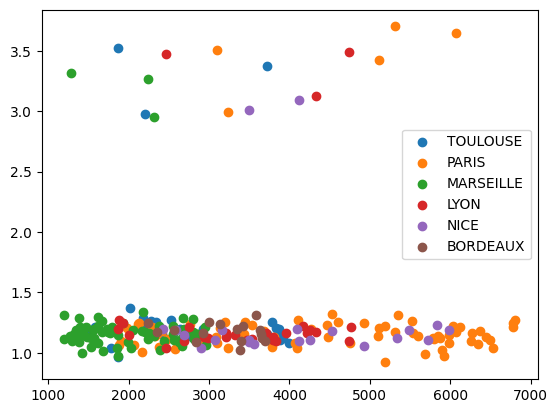

In [14]:
for ville in prets['ville'].unique() :
  df = prets.loc[prets['ville']==ville]
  plt.scatter(df['revenu'],df['taux'],label=ville)
plt.legend()
plt.show()